In [1]:
#Importing library
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
import numpy as np

np.random.seed(1000)

#Instantiation
AlexNet = Sequential()

#1st Convolutional Layer
AlexNet.add(Conv2D(filters=96, input_shape=(227,227,3), kernel_size=(11,11), strides=(4,4), padding='valid'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

#2nd Convolutional Layer
AlexNet.add(Conv2D(filters=256, kernel_size=(5, 5), strides=(1,1), padding='valid'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

#3rd Convolutional Layer
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

#4th Convolutional Layer
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

#5th Convolutional Layer
AlexNet.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

#Passing it to a Fully Connected layer
AlexNet.add(Flatten())
# 1st Fully Connected Layer
AlexNet.add(Dense(4096, input_shape=(227,227,3,)))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
# Add Dropout to prevent overfitting
AlexNet.add(Dropout(0.4))

#2nd Fully Connected Layer
AlexNet.add(Dense(4096))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
#Add Dropout
AlexNet.add(Dropout(0.5))

#3rd Fully Connected Layer
AlexNet.add(Dense(1000))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

#Add Dropout
AlexNet.add(Dropout(0.5))

#Output Layer
AlexNet.add(Dense(8))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('softmax'))

#Model Summary
AlexNet.summary()

# Compile Model
AlexNet.compile(loss = keras.losses.categorical_crossentropy, optimizer= 'adam', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 55, 55, 96)        34944     
_________________________________________________________________
batch_normalization (BatchNo (None, 55, 55, 96)        384       
_________________________________________________________________
activation (Activation)      (None, 55, 55, 96)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 23, 23, 256)       614656    
_________________________________________________________________
batch_normalization_1 (Batch (None, 23, 23, 256)       1024      
_________________________________________________________________
activation_1 (Activation)    (None, 23, 23, 256)       0

In [2]:
from sklearn.model_selection import train_test_split

data=np.load('images.npy')
target=np.load('target.npy')

x_train,x_test,y_train,y_test=train_test_split(data,target,test_size=0.2)

#Train-validation-test split
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.3)

#Dimension of the CIFAR10 dataset
print((x_train.shape,y_train.shape))
print((x_val.shape,y_val.shape))
print((x_test.shape,y_test.shape))

((3454, 227, 227, 3), (3454, 8))
((1481, 227, 227, 3), (1481, 8))
((1234, 227, 227, 3), (1234, 8))


In [3]:
#Image Data Augmentation
from keras.preprocessing.image import ImageDataGenerator

train_generator = ImageDataGenerator(rotation_range=2, horizontal_flip=True,zoom_range=.1 )

val_generator = ImageDataGenerator(rotation_range=2, horizontal_flip=True,zoom_range=.1)

test_generator = ImageDataGenerator(rotation_range=2, horizontal_flip= True,zoom_range=.1)

#Fitting the augmentation defined above to the data
train_generator.fit(x_train)
val_generator.fit(x_val)
test_generator.fit(x_test)

In [4]:
# #Learning Rate Annealer
# from keras.callbacks import ReduceLROnPlateau
# lrr= ReduceLROnPlateau(monitor='val_acc',factor=.01,patience=3,min_lr=1e-5) 

In [16]:
#Defining the parameters
batch_size= 100
epochs=20
learn_rate=0.001

In [18]:
#Training the model
hist = AlexNet.fit_generator(
    train_generator.flow(x_train, y_train, batch_size=batch_size),
    epochs = epochs,
    steps_per_epoch = x_train.shape[0]//batch_size,
    validation_data = val_generator.flow(x_val, y_val, batch_size=batch_size),
    validation_steps = 250,
    verbose=1
)

Epoch 1/20
34/34 [==============================] - 180s 5s/step - loss: 0.1791 - accuracy: 0.9982 - val_loss: 2.5291 - val_accuracy: 0.1425
Epoch 2/20
34/34 [==============================] - 126s 4s/step - loss: 0.1643 - accuracy: 0.9994
Epoch 3/20
34/34 [==============================] - 128s 4s/step - loss: 0.1572 - accuracy: 1.0000
Epoch 4/20
34/34 [==============================] - 127s 4s/step - loss: 0.1472 - accuracy: 1.0000
Epoch 5/20
34/34 [==============================] - 126s 4s/step - loss: 0.1338 - accuracy: 1.0000
Epoch 6/20
34/34 [==============================] - 128s 4s/step - loss: 0.1287 - accuracy: 1.0000
Epoch 7/20
34/34 [==============================] - 126s 4s/step - loss: 0.1254 - accuracy: 1.0000
Epoch 8/20
34/34 [==============================] - 127s 4s/step - loss: 0.1175 - accuracy: 1.0000
Epoch 9/20
34/34 [==============================] - 126s 4s/step - loss: 0.1122 - accuracy: 0.9997
Epoch 10/20
34/34 [==============================] - 126s 4s/step -

In [19]:
print(hist.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


ValueError: x and y must have same first dimension, but have shapes (20,) and (1,)

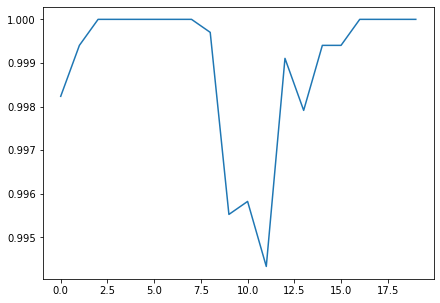

In [20]:
train_acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
xc=range(epochs)

#Plot Graph
plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.title('Train Accuracy vs Validation Accuracy')
plt.grid('True')
plt.legend(['train','val'],loc=4)
plt.style.use(['classic'])

ValueError: x and y must have same first dimension, but have shapes (20,) and (1,)

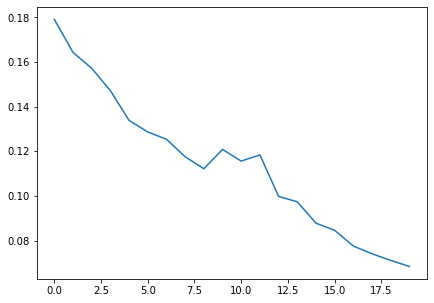

In [21]:
train_loss = hist.history['loss']
val_loss = hist.history['val_loss']
xc=range(epochs)

#Plot Graph
plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.title('Train Loss vs Validation Loss')
plt.grid('True')
plt.legend(['train','val'])
plt.style.use(['classic'])

In [ ]:
#Defining function for confusion matrix plot
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

#Print Confusion matrix
    fig, ax = plt.subplots(figsize=(7,7))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

np.set_printoptions(precision=2)

Confusion matrix, without normalization


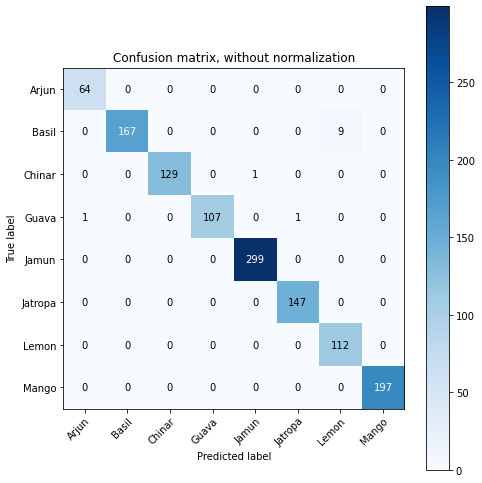

In [23]:
#Making prediction
y_pred=AlexNet.predict_classes(x_test)
y_true=np.argmax(y_test,axis=1)

#Plotting the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_mtx=confusion_matrix(y_true,y_pred)

class_names=['Arjun', 'Basil', 'Chinar', 'Guava', 'Jamun', 'Jatropa', 'Lemon', 'Mango']

# Plotting non-normalized confusion matrix
plot_confusion_matrix(y_true, y_pred, classes = class_names,title = 'Confusion matrix, without normalization')


In [24]:
#Classification accuracy
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(y_true, y_pred)
print('Accuracy Score = ', acc_score)

Accuracy Score =  0.9902755267423015


In [25]:
AlexNet.save('Aayu')

INFO:tensorflow:Assets written to: Aayu\assets
